# Introduction

There are two primary methods for extracting data from a website. One is by utilizing the website's API (if there is). Many websites provide APIs that allow users to retrieve data posted on their platforms. For instance, YouTube provides an API that enables developers to integrate YouTube's video hosting and streaming capabilities into their applications. The API allows you to search for videos, retrieve video details, upload videos, manage playlists, and perform other operations related to YouTube's vast collection of videos.

Another methods is by accessing the webpage's HTML and extracting relevant information. This technique is commonly known as web scraping, web harvesting, or web data extraction. In this process, the HTML content of the webpage is accessed, and useful data is extracted from it. This article focuses on the steps involved in web scraping, using Beautiful Soup, a Python framework for web scraping.

The following steps outline the web scraping process:

a. Send an HTTP request to the URL of the webpage you wish to access. The server responds to the request by returning the HTML content of the webpage. To accomplish this, we will employ the Python library "requests," which is a third-party HTTP library.

b. Once the HTML content is obtained in the get_soup function, it is passed to the bs4.BeautifulSoup constructor to create a parse tree. This parse tree represents the hierarchical structure of the HTML data. By using a parser like Beautiful Soup, the code can handle the nested nature of the HTML, allowing for easier extraction of desired information.

c. After parsing the HTML and obtaining the parse tree using Beautiful Soup, we can use methods like find_all to navigate and search the parse tree. The soup.find_all method in the succeeding discussion, for example, searches for specific HTML elements based on their tag name and class attributes. This process of navigating and searching the parse tree allows the code to locate and extract the desired data from the HTML structure.

This article provides a guide on scraping reviews from specific hotels on TripAdvisor.com.ph using BeautifulSoup. By familiarizing yourself with the concepts and techniques presented in this article, you will gain a good foundation in web scraping reviews from specific hotels on TripAdvisor.com.ph. Additionally, these fundamental principles can be applied to scrape reviews from a variety of hotels and even other websites, empowering you to expand your web scraping capabilities beyond TripAdvisor and explore other online platforms with confidence.

# Installing Necessary Libraries

Let us start by making sure all necessary Python libraries are installed and imported. You can run the following one-liner code to install the necessary Python packages:

```python

!pip install requests bs4 numpy pandas
```

After installation, you can now import the following libraries:

In [3]:
import requests
import bs4
import numpy as np
import pandas as pd
import re

# Defining Webscraping Functions

To begin web scraping, the first step is to determine the main URL of the website from which we intend to extract data. In this scenario, as we are focusing on scraping TripAdvisor.com.ph, we assign the main URL as below. Additionally, we identify the specific URL of the hotel for which we desire to obtain reviews. For this example, we have selected the hotel 'La Carmela de Boracay', and the URL of its first page will serve as our starting point.

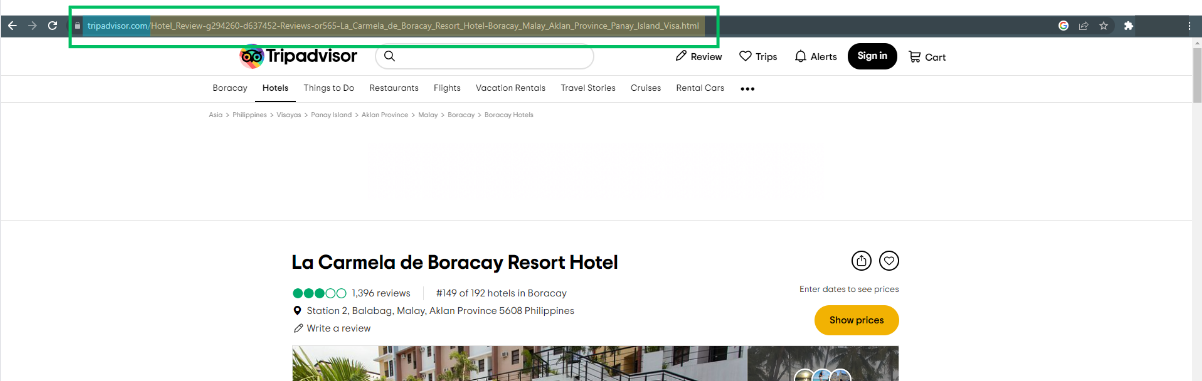

In [7]:
# La Carmela de Boracay
main = 'https://www.tripadvisor.com.ph'
url_first = '/Hotel_Review-g294260-d637452-Reviews-La_Carmela_de_Boracay_Resort_Hotel-Boracay_Malay_Aklan_Province_Panay_Island_Visay.html'

We then define a function, 'get_soup'. 

In [8]:
def get_soup(url):
    """
    Return a BeautifulSoup from the input `url`.
    """
    headers = {'User-Agent': 'Mozilla/5.0'}
    proxies = {'http': 'http://206.189.157.23'}
    soup = bs4.BeautifulSoup(
        requests.get(url, headers=headers, proxies=proxies).content
    )
    return soup

The function get_soup(url) takes a URL as input and returns a BeautifulSoup object representing the parsed HTML content of the webpage at the specified URL.

Here is a breakdown of the function's steps:

- The function starts by defining the headers dictionary, which includes the user agent information. This helps identify the client (in this case, the code) making the request. The User-Agent header is set to 'Mozilla/5.0', which is a common user agent string. You can customize the user agent information based on your requirements. Instead of using the common user agent string 'Mozilla/5.0', you can set it to a specific user agent that suits your scraping needs. 

- Next, the proxies dictionary is defined, which specifies the proxy server to be used for the HTTP requests. In this case, the proxy used is hidden. If you need to use a proxy, you can obtain the proxy server and port from a trusted source or proxy provider. Here's an example of how to set a different proxy:

    proxies = {'http': 'http://your-proxy-server:your-proxy-port'}

  If you don't need to use a proxy, you can omit the proxies dictionary or set it to None

- The function then utilizes the requests.get() method to send an HTTP GET request to the specified URL. The headers and proxies parameters are passed to the get() method to include the user agent and proxy server information in the request.

- The requests.get() method returns the content of the webpage as a response object. The .content attribute is used to access the HTML content of the response.

- The HTML content is passed to the bs4.BeautifulSoup() constructor, which creates a BeautifulSoup object by parsing the HTML. This object represents the hierarchical structure of the HTML content, allowing for easy traversal and extraction of data.

- Finally, the function returns the BeautifulSoup object, which can be further used to navigate and extract desired information from the HTML structure.

On the other hand, we create another function 'get_reviews' described below. 

In [9]:
def get_reviews(soup):
    """
    Extracts reviews, ratings, and dates from the provided BeautifulSoup
    object.

    Args:
        soup (BeautifulSoup): The BeautifulSoup object representing
        the parsed HTML content.

    Returns:
        pandas.DataFrame: A DataFrame containing the extracted reviews,
        ratings, and dates.

    """
    review_list = []
    for review in soup.find_all('span', class_='QewHA H4 _a'):
        review_list.append(review.getText())

    rating_list = []
    for rating in soup.find_all('div', class_="Hlmiy F1"):
        rating_list.append(rating.find('span').get('class')[1])
        
    date_list = []
    for date in soup.find_all('span', class_='teHYY _R Me S4 H3'):
        date_list.append(date.getText())
    
    if ((len(review_list) != len(rating_list)) |
        (len(rating_list) != len(date_list)) |
         (len(review_list) != len(date_list))):
        min_len = min(len(review_list), len(rating_list), len(date_list))
        review_list = review_list[:min_len]
        rating_list = rating_list[:min_len]
        date_list = date_list[:min_len]
    df = pd.DataFrame({'reviews': review_list,
                       'ratings': rating_list,
                       'date': date_list})
    return df

The function get_reviews(soup) takes a BeautifulSoup object (soup) as input and performs the following steps to extract reviews from the parsed HTML content:

- It initializes three empty lists: review_list, rating_list, and date_list to store the extracted information.

- Using the soup.find_all() method, it searches for HTML elements that match specific criteria to extract the reviews, ratings, and dates. The find_all() method searches for all elements that have the specified tag name and class attribute.

- The first loop searches for `<span>` elements with the class 'QewHA H4 _a' and appends the text content of each element (review) to the review_list. The class 'QewHA H4 _a' was determine by hovering over a review in the web site, right click then select 'inspect'. A window will appear in the right side showing the assigned class element for the review as below:

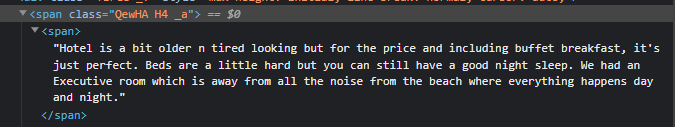

- The second loop searches for `<div>` elements with the class 'Hlmiy F1' and retrieves the class attribute of the nested `<span>` element. The class 'Hlmiy F1' was determined using the step described above. It extracts the second class (rating) using rating.find('span').get('class')[1] and appends it to the rating_list. Note that in this case we can get the rating using the class 'ui_bubble_rating bubble_40'. Upon inspecting the web site, it appears that this is the equivalent of a 4-star rating. We can later on use regex to extract '4' from this text.

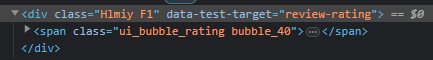

- The third loop searches for `<span>` elements with the class 'teHYY _R Me S4 H3' and appends the text content (date) of each element to the date_list.

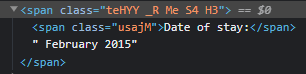

- After extracting the review, rating, and date data, the function checks if the lists have different lengths. If there is a mismatch in the lengths, it truncates the lists to the minimum length to ensure data consistency.

- Finally, it creates a pandas DataFrame (df) from the extracted lists, where each list corresponds to a column. The DataFrame has columns for 'reviews', 'ratings', and 'date'. It returns this DataFrame as the result of the function.

In summary, the get_reviews function utilizes the provided BeautifulSoup object to search for specific HTML elements and extract review, rating, and date information. It ensures data consistency and returns the extracted data in a structured DataFrame format.

Lastly, another function that is introduced in this article is 'scrape_reviews'. The function scrape_reviews(main, url_first, total_reviews) takes three parameters as input: 'main', which represents the main URL of the website; 'url_first', which is the URL of the first page of the hotel; and 'total_reviews', which specifies the maximum number of reviews to scrape.

In [10]:
def scrape_reviews(main, url_first, total_reviews):
    """
    Scrape reviews from multiple pages of a hotel on TripAdvisor.

    Args:
        main (str): The main URL of the website.
        url_first (str): The URL of the first page of the hotel.
        total_reviews (int): The maximum number of reviews to scrape.

    Returns:
        pandas.DataFrame: A DataFrame containing the scraped reviews,
        ratings, and dates.
    """
    df_all = pd.DataFrame()
    url = main + url_first
    soup = get_soup(url)
    df_all = get_reviews(soup)

    while (len(df_all) <= total_reviews):
        try:
            next_url = main + (soup.find('a',
                                         class_='ui_button nav next primary')
                               .get('href'))
            next_soup = get_soup(next_url)
            df = get_reviews(next_soup)
            df_all = pd.concat([df_all, df])
            soup = next_soup
        except AttributeError:
            break
    df_all = df_all.reset_index().drop('index', axis=1)
    df_all['ratings'] = df_all['ratings'].apply(lambda x:
                                                int(re.findall(r'\d', x)[0]))
    df_all['date'] = df_all['date'].apply(lambda x:
                            re.findall(r'Date of stay: (\w+ \d+)', x)[0])
    return df_all
    

The following are the step-by-step breakdown of this function:

- It initializes an empty DataFrame df_all to store all the scraped reviews.

- It constructs the URL of the first page by concatenating 'main' and 'url_first'. This forms the complete URL of the hotel page.

- It calls the get_soup(url) function to obtain a BeautifulSoup object (soup) by sending an HTTP request to the URL and parsing the HTML content.

- It calls the get_reviews(soup) function to extract the reviews, ratings, and dates from the BeautifulSoup object. The resulting DataFrame is assigned to df_all.

- It enters a while loop to continue scraping reviews until the length of df_all reaches or exceeds total_reviews.

- Inside the loop, it tries to find the URL of the next page by locating the 'next' button element in the parsed HTML using the class 'ui_button nav next primary'. It extracts the URL using .get('href').

- It obtains a new BeautifulSoup object (next_soup) by sending an HTTP request to the next page URL.

- It calls the get_reviews(next_soup) function to extract reviews, ratings, and dates from the new page and stores the result in the DataFrame df.

- It concatenates the new DataFrame df with the existing DataFrame df_all using pd.concat().

- It updates the soup variable to the newly parsed page's BeautifulSoup object (next_soup).

- If an AttributeError occurs while trying to find the 'next' button or parsing the page, it breaks the loop, as it indicates that there are no more pages to scrape.

- After the loop ends, it resets the index of the DataFrame (df_all) and drops the previous index column.

- It applies a lambda function to convert the ratings column to integers by extracting the first digit from each rating value using regular expressions.

- It applies another lambda function to extract the date of stay from the date column by using a regular expression pattern.

- Finally, it returns the modified DataFrame df_all containing all the scraped reviews.

In summary, the scrape_reviews function iteratively scrapes reviews from multiple pages, concatenates the results into a single DataFrame, and performs data cleaning and formatting before returning the final result.

# Samples of Web Scraping Results

## Hotel Name: La Carmela de Boracay

We will use the main url and the first-page url defined above. We will also set maximum reviews to get to 1,500. Please refer to the available number of reviews in the website in setting this value. We should choose a value that is above the maximum reviews available based on the web site.

In [13]:
# main and url_first and defined above
df_lacarmela = scrape_reviews(main, url_first, 1500)

We can check on the total number of reviews we are able to scrape using the following function.

In [14]:
len(df_lacarmela)

1273

We can then save the scraped reviews as a csv file. Simply change the 'file_directory' based on where you want your file to be saved in your directory.

In [161]:
file_directory = '~/ML3/ml3-project/lacarmela.csv'
df_lacarmela.to_csv(file_directory, index=False)

Here's a display of the first few rows of our dataset.

In [162]:
df_lacarmela.head()

,reviews,ratings,date
0,1. You’ll be surprised as to how many trainees...,4,April 2023
1,My family and I stayed at La Carmela for only ...,2,February 2023
2,"Room was good, however needs sound proofing es...",4,January 2023
3,This is the only hotel that I have experienced...,1,December 2022
4,Superb location and accessible to the beach . ...,3,October 2022


For sanity check, we can count the number of unique row values of our dataset.

In [163]:
df_lacarmela.nunique()

reviews    1271
ratings       5
date        162
dtype: int64

Here, we display the number of reviews per rating.

In [15]:
df_lacarmela.groupby('ratings').count()

,reviews,date
ratings,,
1,204,204
2,191,191
3,432,432
4,331,331
5,115,115


Looks great!

## Hotel Name: Crimson Resort and Spa Boracay

In [165]:
# Crimson Resort and Spa Boracay
url_crimson = '/Hotel_Review-g294260-d12927315-Reviews-Crimson_Resort_and_Spa_Boracay-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html'
df_crimson = scrape_reviews(main, url_crimson, 1094)

In [166]:
df_crimson.to_csv('~/ML3/ml3-project/crimson.csv', index=False)

In [167]:
df_crimson.head()

,reviews,ratings,date
0,I have been coming back to Crimson over the pa...,5,June 2023
1,"Been to Boracay countless times, and Crimson i...",5,June 2022
2,We had an amazing time in Crimson. Impeccable ...,5,May 2023
3,My partner and I had a short stay at the resor...,5,May 2023
4,We've been to several countries and hotels but...,5,May 2023


In [168]:
df_crimson.nunique()

reviews    1034
ratings       5
date         54
dtype: int64

In [169]:
df_crimson.groupby('ratings').count()

,reviews,date
ratings,,
1,18,18
2,17,17
3,33,33
4,82,82
5,884,884


## Hotel Name: Savoy Hotel

In [170]:
# Savoy Hotel
url_savoy = '/Hotel_Review-g294260-d12221115-Reviews-Savoy_Hotel_Boracay_Newcoast-Boracay_Malay_Aklan_Province_Panay_Island_Visayas.html'
df_savoy = scrape_reviews(main, url_savoy, 781)

In [171]:
df_savoy.head()

,reviews,ratings,date
0,"First, the lobbyist (Ms. Lyn) was very friendl...",5,June 2023
1,This hotel is one of our fav. so far. We came ...,5,August 2022
2,Nice room accommodation and superb service🥰 Pl...,5,June 2023
3,If you are looking for a place outside the hus...,5,June 2023
4,We loved everything about Savoy Hotel. PROS: ...,4,May 2023


In [172]:
df_savoy.groupby('ratings').count()

,reviews,date
ratings,,
1,19,19
2,19,19
3,25,25
4,88,88
5,573,573


In [173]:
df_savoy.to_csv('~/ML3/ml3-project/savoy.csv', index=False)

# Conclusion

In summary, the provided code demonstrates a web scraping process using BeautifulSoup to extract hotel reviews from TripAdvisor.com.ph. The code showcases steps such as obtaining the main URL, parsing HTML content, navigating through pages, and extracting relevant data. By understanding this code, one can apply similar techniques to scrape reviews from other hotels and websites as well.

Thank you for reading! :)